<a href="https://colab.research.google.com/github/thamarai-s15/DL_IC/blob/main/DL_Mobilenet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt


In [4]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize and preprocess
x_train = preprocess_input(x_train)
x_test = preprocess_input(x_test)

# One-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [5]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
base_model.trainable = False  # freeze base model


/tmp/ipython-input-322767072.py:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(32, 32, 3))


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')  # 10 classes for CIFAR-10
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [9]:
history = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=3,
    batch_size=64
)


Epoch 1/3
782/782 ━━━━━━━━━━━━━━━━━━━━ 67s 86ms/step - accuracy: 0.3197 - loss: 1.8562 - val_accuracy: 0.3113 - val_loss: 1.8924
Epoch 2/3
782/782 ━━━━━━━━━━━━━━━━━━━━ 65s 83ms/step - accuracy: 0.3240 - loss: 1.8506 - val_accuracy: 0.3105 - val_loss: 1.8932
Epoch 3/3
782/782 ━━━━━━━━━━━━━━━━━━━━ 63s 81ms/step - accuracy: 0.3263 - loss: 1.8358 - val_accuracy: 0.3098 - val_loss: 1.8943


313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 40ms/step - accuracy: 0.3132 - loss: 1.8866
Test Accuracy: 0.31


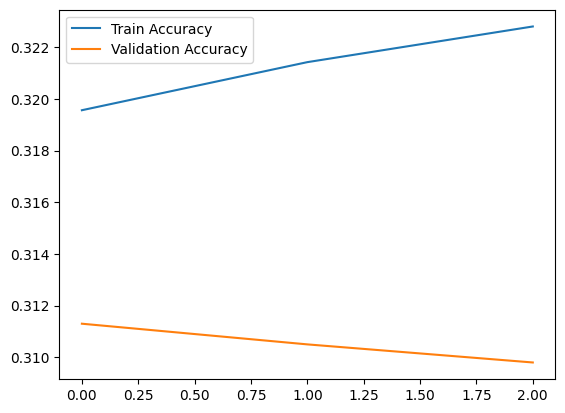

In [10]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")

# Plot training results
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()


In [13]:
base_model.trainable = True
for layer in base_model.layers[:-20]:
    layer.trainable = False

model.compile(optimizer=tf.keras.optimizers.Adam(1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=1)


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 162s 97ms/step - accuracy: 0.2816 - loss: 20.4799 - val_accuracy: 0.2570 - val_loss: 2.7812
